In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC

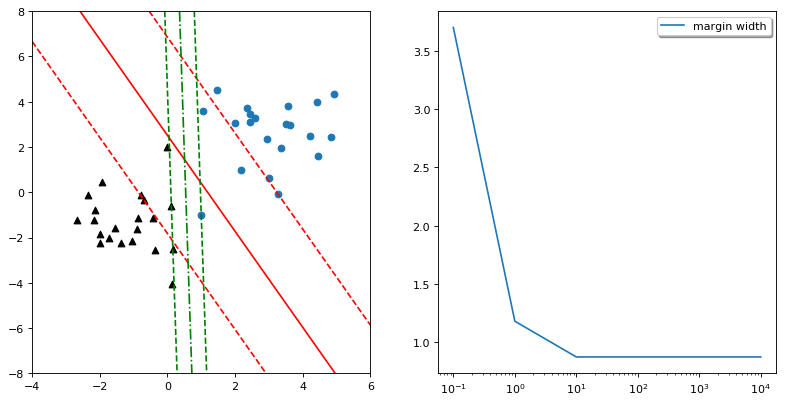

In [2]:
def generateData(n):
    """
    生成模型所需数据
    """
    np.random.seed(2046)
    X = np.r_[np.random.randn(n, 2) - [1, 1], np.random.randn(n, 2) + [3, 3]]
    Y = [[0]] * n + [[1]] * n
    data = np.concatenate((Y, X), axis=1)
    data = pd.DataFrame(data, columns=["y", "x1", "x2"])
    hardMargin = [[0, 0, 2], [1, 1, -1]]
    hardMargin = pd.DataFrame(hardMargin, columns=["y", "x1", "x2"])
    data = data.append(hardMargin)
    return data

def hardSoftMargin(data):
    """
    从小到大，用不同的损失系数训练模型
    """
    C = []
    res = []
    for i in range(-1, 5):
        C_ = 10 ** i
        model = SVC(C=C_, kernel="linear")
        model.fit(data[["x1", "x2"]], data["y"])
        res.append(model)
        C.append(C_)
    visualize(data, C, res)


def visualize(data, C, res):
    """
    将模型结果可视化
    """
    # 创建一个图形框
    fig = plt.figure(figsize=(12, 6), dpi=80)
    # 在图形框里画两幅图
    ax = fig.add_subplot(1, 2, 1)
    label1 = data[data["y"]>0]
    ax.scatter(label1[["x1"]], label1[["x2"]], marker="o")
    label0 = data[data["y"]==0]
    ax.scatter(label0[["x1"]], label0[["x2"]], marker="^", color="k")
    x1 = np.linspace(-4, 6, 100)
    x2 = np.linspace(-8, 8, 100)
    X1, X2 = np.meshgrid(x1, x2)
    # Soft margin
    soft = res[0].decision_function(np.c_[X1.ravel(), X2.ravel()])
    soft = soft.reshape(X1.shape)
    CS = ax.contour(X1, X2, soft, levels=[-1, 0, 1], colors=["r", "r", "r"],
        linestyles=["--", "-", "--"])
    # Hard margin
    hard = res[-1].decision_function(np.c_[X1.ravel(), X2.ravel()])
    hard = hard.reshape(X1.shape)
    ax.contour(X1, X2, hard, levels=[-1, 0, 1], colors=["g", "g", "g"],
        linestyles=["--", "-.", "--"])
    ax1 = fig.add_subplot(1, 2, 2)
    # Python2和Python3的map并不兼容，所以使用list(map)
    coef = list(map(lambda x: x.coef_, res))
    margin = list(map(lambda x: 2.0 / np.sqrt(x.dot(x.T)).item(), coef))
    ax1.plot(C, margin, label="margin width")
    ax1.set_xscale('log')
    legend = plt.legend(shadow=True, loc="best")
    plt.show()
    
data = generateData(20)
hardSoftMargin(data)

Tips: 带箭头的注释

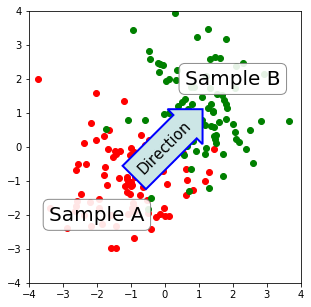

In [3]:
import numpy as np
import matplotlib.pyplot as plt
 
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_aspect(1)
 
x1 = -1 + np.random.randn(100)
y1 = -1 + np.random.randn(100)
x2 = 1. + np.random.randn(100)
y2 = 1. + np.random.randn(100)
 
ax.scatter(x1, y1, color="r")
ax.scatter(x2, y2, color="g")
 
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
ax.text(-2, -2, "Sample A", ha="center", va="center", size=20,
    bbox=bbox_props)
ax.text(2, 2, "Sample B", ha="center", va="center", size=20,
    bbox=bbox_props)
 

bbox_props = dict(boxstyle="rarrow", fc=(0.8, 0.9, 0.9), ec="b", lw=2)
t = ax.text(0, 0, "Direction", ha="center", va="center", rotation=45,
      size=15,
      bbox=bbox_props)
 
bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)
 
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
 
plt.show()

# 非线性 SVM 

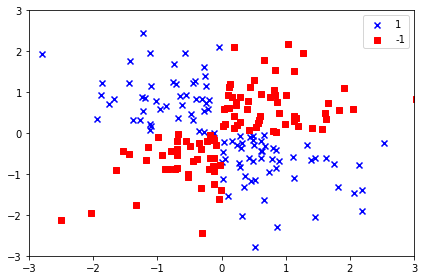

In [4]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('images/03_12.png', dpi=300)
plt.show()

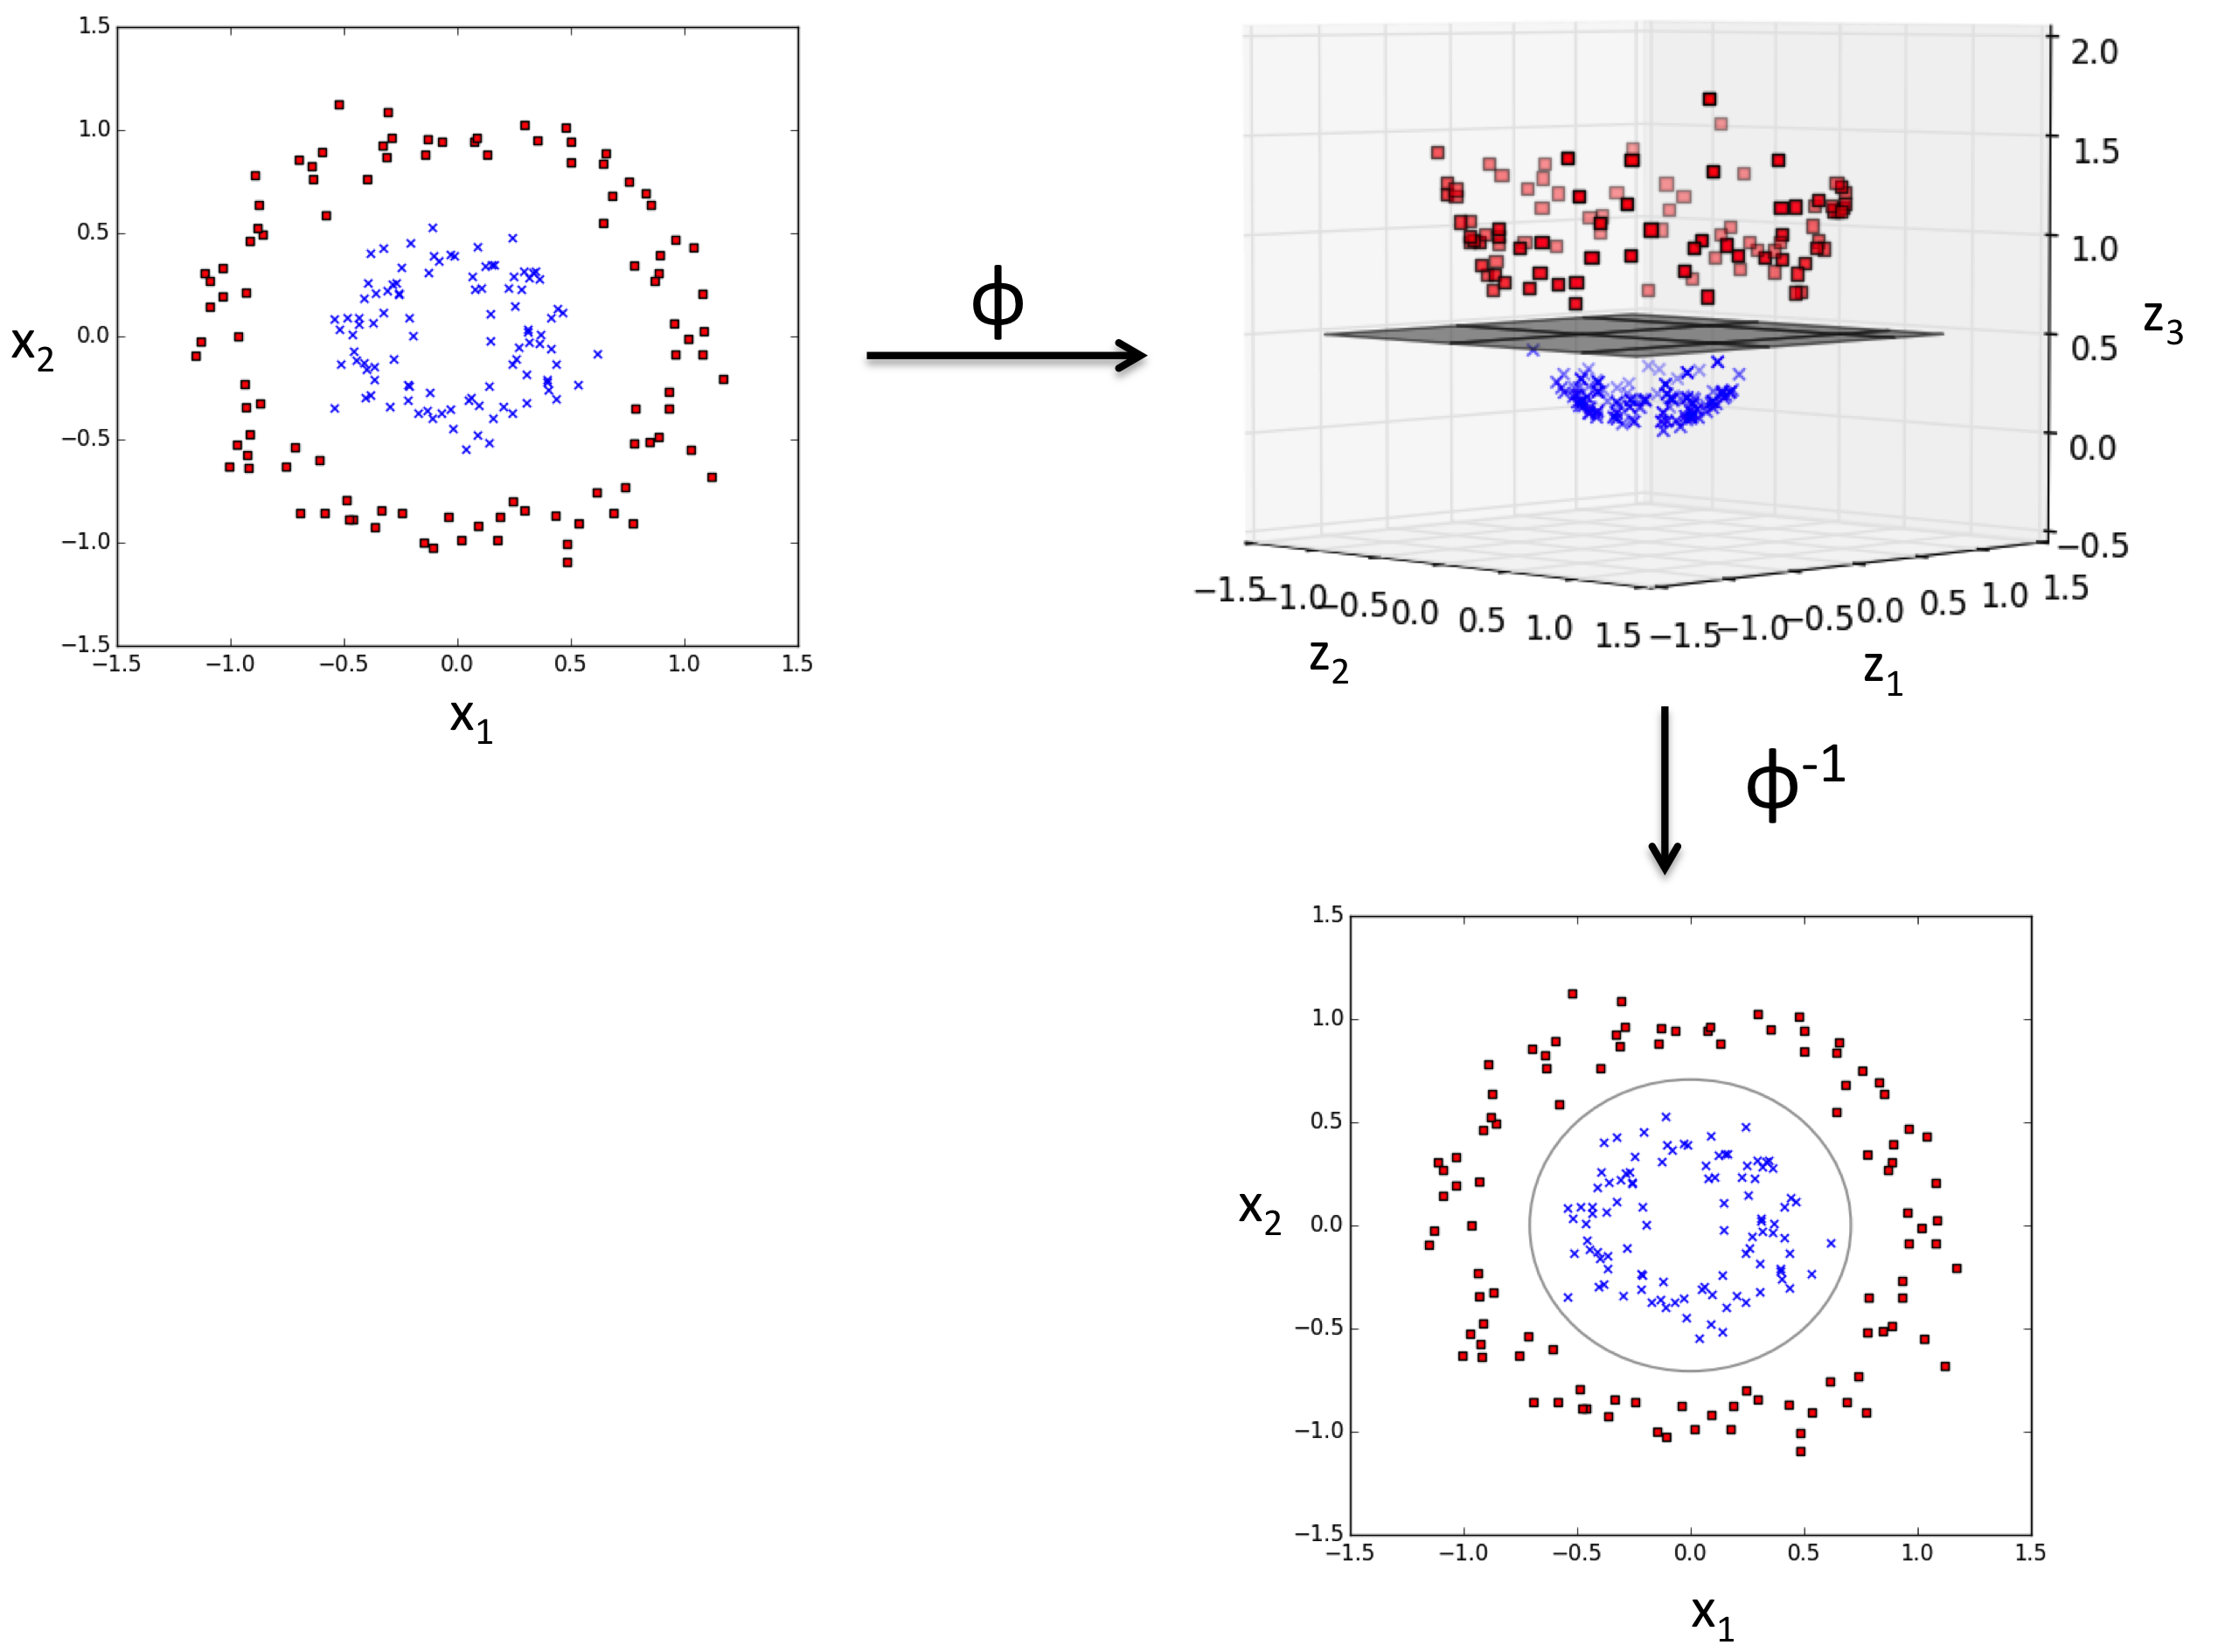

In [7]:
from IPython.display import Image
Image(filename='images/03_13.png', width=700) 

## 使用 RBF 核

In [15]:
%pylab inline
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

Populating the interactive namespace from numpy and matplotlib


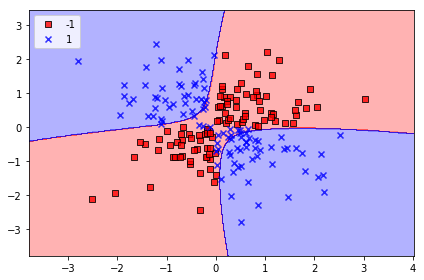

In [16]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_14.png', dpi=300)
plt.show()

In [21]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

Class labels: [0 1 2]


In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

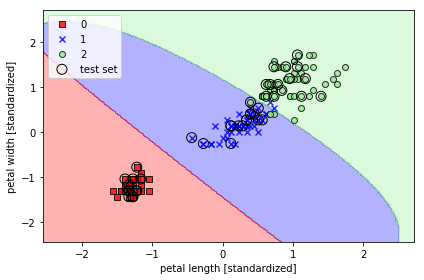

In [27]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_15.png', dpi=300)
plt.show()

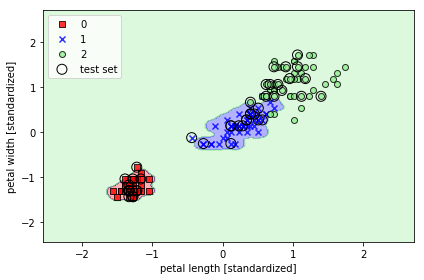

In [28]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_16.png', dpi=300)
plt.show()